In [83]:
#your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
df=pd.read_csv('superheated_vapor_properties (1).csv')
df.shape

(544, 37)

In [85]:
df.head()

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.00,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.334,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.90,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.335,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.60,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.106,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.82,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.010,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.00,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000


In [86]:
a=df[df['Pressure']<300]
b=df[df['Pressure']>=300 ]
b=b[df['Pressure']<1500]
c=df[df['Pressure']>=1500]

C:\Users\rohan\AppData\Local\Temp\ipykernel_41520\1866741433.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=b[df['Pressure']<1500]


In [87]:
#################################################  PART A

In [88]:
####sklearn

In [89]:
a1=a[a['Property']=='V']
ya=a1[['Liq_Sat']]
xa=a1[['Pressure']]


In [90]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(xa, ya)

LinearRegression()

In [91]:
m_a = linear_regression.coef_[0]
c_a=linear_regression.intercept_


In [92]:
X_a= np.linspace(xa.min(), xa.max(), 1000)
Y_a=m_a*X_a +c_a
Y_pred_a=m_a*a1['Pressure'] + c_a


C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


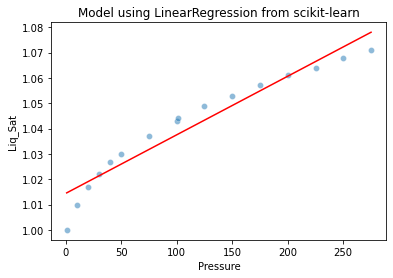

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(a1['Pressure'], a1['Liq_Sat'], alpha=0.5)
plt.plot(X_a, Y_a,color='r')
_ = plt.title("Model using LinearRegression from scikit-learn")

In [94]:
from sklearn.metrics import r2_score
r2_score(a1['Liq_Sat'], Y_pred_a)     ##### r2 value

0.9263208134364597

In [95]:
m_a,c_a  ### slope and intercept

(array([0.00023137]), array([1.01438786]))

In [96]:
####scratch implementation

In [97]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

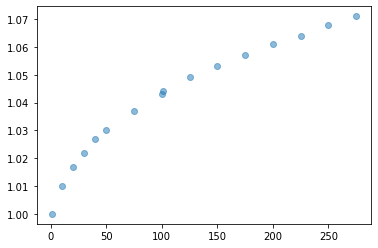

In [98]:
plt.scatter(a1['Pressure'], a1['Liq_Sat'], alpha=0.5)

In [99]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

N=a1['Pressure'].shape[0]
L=[]
def forward_pass(x,m,c):
    return m*x+c
m = np.random.randn(1)


no of iterations: 0


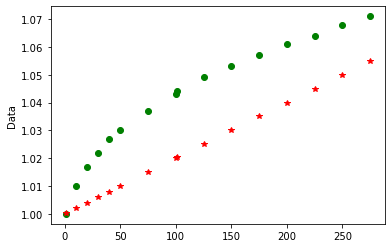

no of iterations: 5000


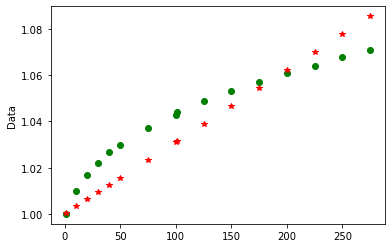

no of iterations: 10000


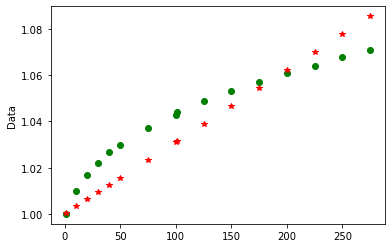

no of iterations: 15000


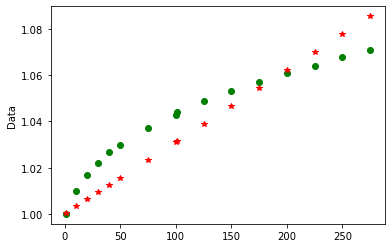

no of iterations: 20000


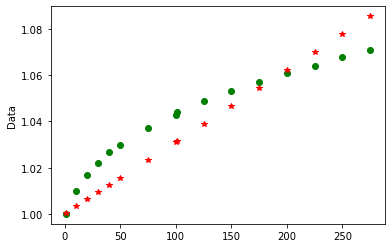

no of iterations: 25000


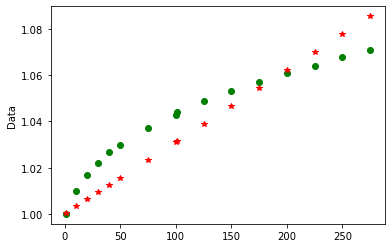

no of iterations: 30000


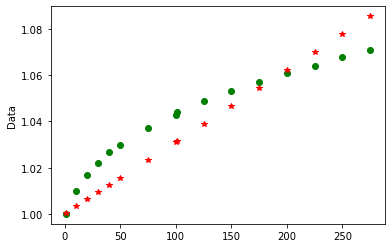

no of iterations: 35000


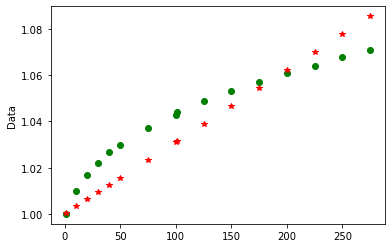

no of iterations: 40000


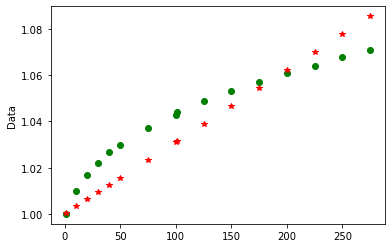

no of iterations: 45000


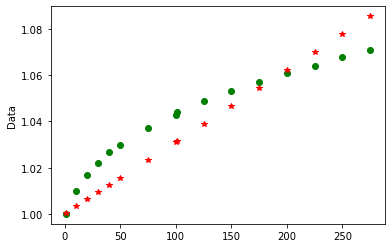

In [121]:
# Random Initialisation
m1 = 0.0002
c1 = 1

# Hyperparameters
learningrate = 0.0000001
numiter = 50000
x=a1['Pressure']
y=a1['Liq_Sat']
for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('Data')
        plt.show()

In [123]:
m1,c1

(0.0003106970849965928, 1.0001106970849813)

In [124]:
#R2 VALUE SCRATCH
ss_t = 0
ss_r = 0
mean_y=np.mean(y)
m=len(x)

for i in range(m):
    
    y_pred = c1 + m1 * x[4*i]
    ss_t += (y[4*i] - mean_y) ** 2
    ss_r += (y[4*i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.7547337052175034


In [26]:
##################################PART  B

In [27]:
########sklearn

In [125]:
b1=b[b['Property']=='V']
yb=b1[['Liq_Sat']]
xb=b1[['Pressure']]

In [126]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(xb, yb)

LinearRegression()

In [127]:
m_b = linear_regression.coef_[0]
c_b=linear_regression.intercept_

In [128]:
X_b= np.linspace(xb.min(), xb.max(), 1000)
Y_b=m_b*X_b +c_b
Y_pred_b=m_b*b1['Pressure'] + c_b

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


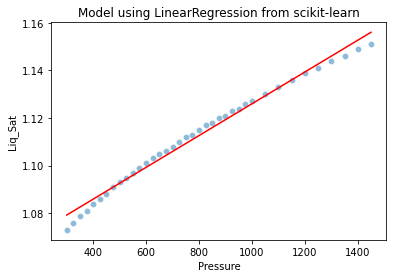

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(b1['Pressure'], b1['Liq_Sat'], alpha=0.5)
plt.plot(X_b, Y_b,color='r')
_ = plt.title("Model using LinearRegression from scikit-learn")

In [130]:
from sklearn.metrics import r2_score
r2_score(b1['Liq_Sat'], Y_pred_b)     ##### r2 value

0.9870087187227413

In [131]:
m_b,c_b  ### slope and intercept

(array([6.67710359e-05]), array([1.05921557]))

In [132]:
####scratch

In [133]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

N=b1['Pressure'].shape[0]
L=[]
def forward_pass(x,m,c):
    return m*x+c
m = np.random.randn(1)


no of iterations: 0


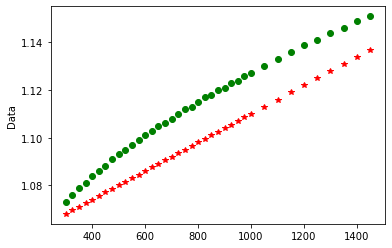

no of iterations: 5000


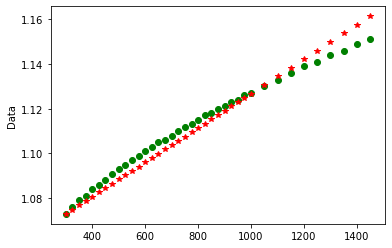

no of iterations: 10000


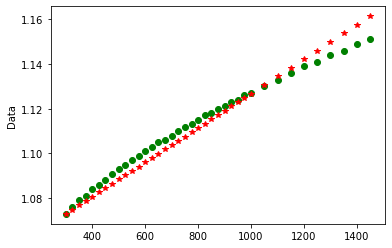

no of iterations: 15000


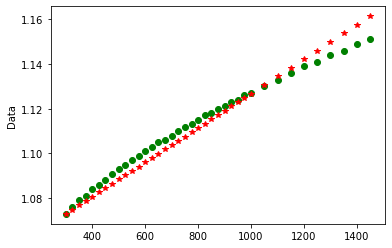

no of iterations: 20000


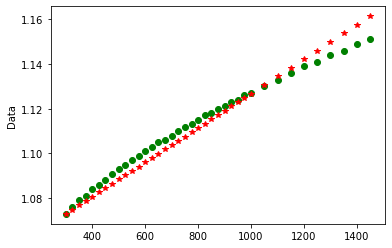

no of iterations: 25000


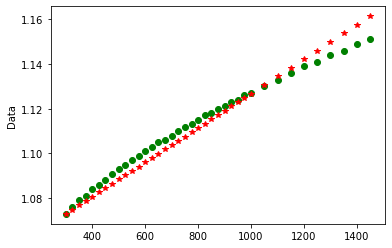

no of iterations: 30000


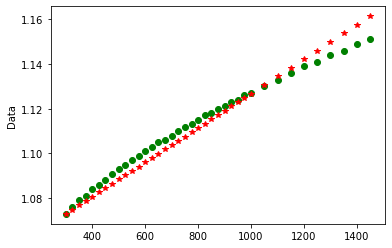

no of iterations: 35000


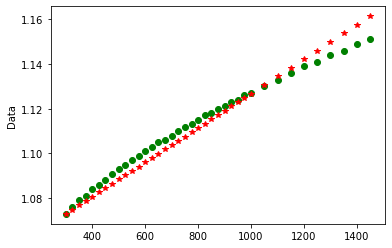

no of iterations: 40000


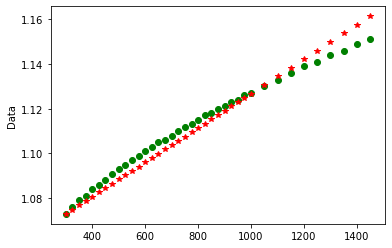

no of iterations: 45000


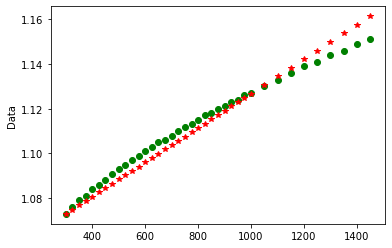

In [135]:
# Random Initialisation
m1 = 6e-05
c1 = 1.05

# Hyperparameters
learningrate = 0.0000001
numiter = 50000
x=b1['Pressure']
y=b1['Liq_Sat']
for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('Data')
        plt.show()

In [136]:
m1,c1

(7.675470080698507e-05, 1.0500167547008066)

In [139]:
##r22 scratch
#R2 VALUE SCRATCH
ss_t = 0
ss_r = 0
mean_y=np.mean(y)
m=len(x)

for i in range(m):
    
    y_pred = c1 + m1 * x[4*i+64]
    ss_t += (y[4*i +64] - mean_y) ** 2
    ss_r += (y[4*i+64] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9613411957934971


In [58]:
################PART C

In [140]:
c1=c[c['Property']=='V']
yc=c1[['Liq_Sat']]
xc=c1[['Pressure']]

In [141]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(xc, yc)

LinearRegression()

In [142]:
m_c = linear_regression.coef_[0]
c_c=linear_regression.intercept_

In [143]:
X_c= np.linspace(xc.min(), xc.max(), 1000)
Y_c=m_c*X_c +c_c
Y_pred_c=m_c*c1['Pressure'] + c_c

C:\Users\rohan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


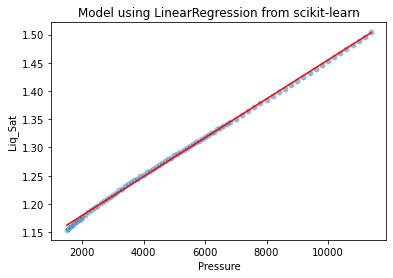

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(c1['Pressure'], c1['Liq_Sat'], alpha=0.5)
plt.plot(X_c, Y_c,color='r')
_ = plt.title("Model using LinearRegression from scikit-learn")

In [145]:
from sklearn.metrics import r2_score
r2_score(c1['Liq_Sat'], Y_pred_c)     ##### r2 value

0.9990370407798591

In [146]:
m_c,c_c

(array([3.44236231e-05]), array([1.11072464]))

In [147]:
#########scratch

In [148]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

N=c1['Pressure'].shape[0]
L=[]
def forward_pass(x,m,d):
    return m*x+d
m = np.random.randn(1)


no of iterations: 0


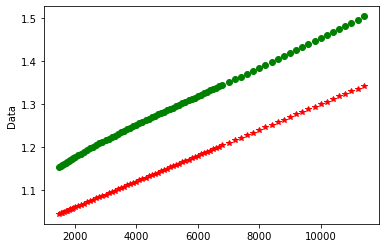

no of iterations: 5000


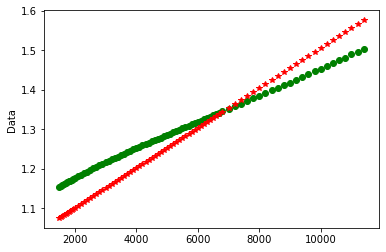

no of iterations: 10000


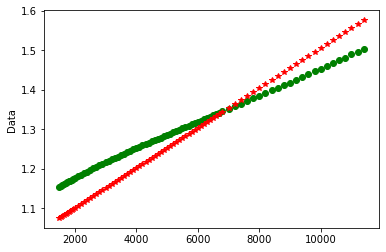

no of iterations: 15000


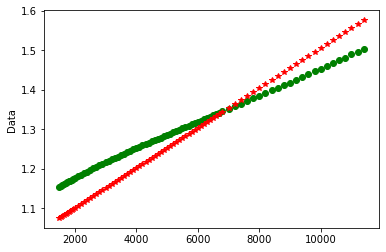

no of iterations: 20000


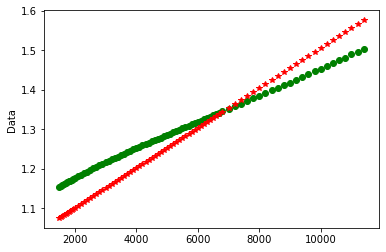

no of iterations: 25000


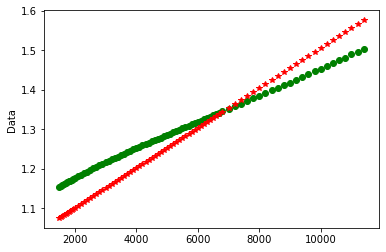

no of iterations: 30000


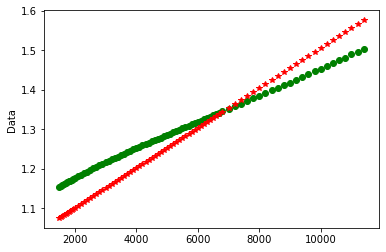

no of iterations: 35000


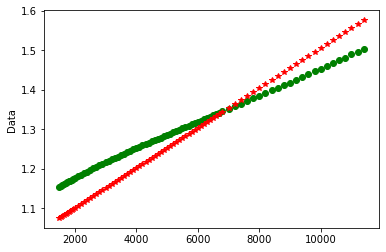

no of iterations: 40000


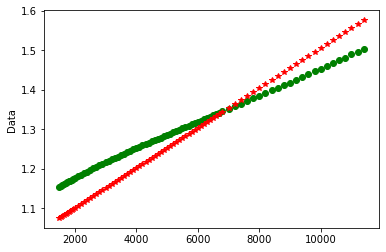

no of iterations: 45000


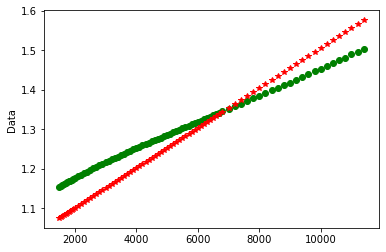

In [149]:
# Random Initialisation
m1 = 3e-05
c_1 = 1

# Hyperparameters
learningrate = 0.00000001
numiter = 50000
x=c1['Pressure']
y=c1['Liq_Sat']
for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c_1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c_1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c_1))
    
    m1 = m1 -learningrate * dm
    c_1 = c_1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('Data')
        plt.show()

In [150]:
m1,c_1

(5.048290363803736e-05, 1.0000204829036383)

In [153]:
##             r2 score
#R2 VALUE SCRATCH
ss_t = 0
ss_r = 0
mean_y=np.mean(y)
m=len(x)

for i in range(m):
    
    y_pred = c_1 + m1 * x[4*i+216]
    ss_t += (y[4*i+216] - mean_y) ** 2
    ss_r += (y[4*i +216] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.722502487439664
